<a href="https://colab.research.google.com/github/Rajnandini17/MachineLearning/blob/main/Copy_of_upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/ number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] += reward 
  total_reward += reward  

## Visualising the results

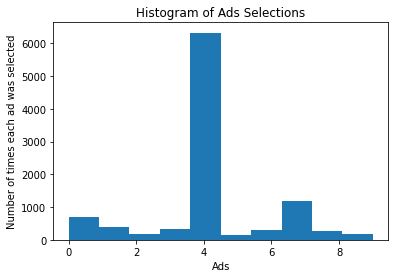

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()